In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as px
import sort_dataframeby_monthorweek as sd

In [2]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [3]:
df2 = pd.read_csv('Update_Hotel_booking.csv')
df2.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                33
adults                              14
children                             5
babies                               5
meal                                 4
country                            178
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                   9
assigned_room_type                  11
booking_changes                     19
deposit_type                         3
agent                              334
company                            349
days_in_waiting_list     

### I will see how many rows and columns do I have in this dataset

In [4]:
df.shape

(119390, 32)

### I will display all the columns name

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

### I want to know how many data different contains each column

In [6]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

# Understanding the dataset. Elements we have by columns 

### How many entries do we have by Hotels

In [7]:
df['hotel'].value_counts()

hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

#### We have an unbalanced data

### Now I want to know how many differents types of meal I have in this dataset

In [8]:
df['meal'].value_counts()

meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64

#### I have 1169 undefined data

### Now I want to know the market segment

In [9]:
df['market_segment'].value_counts()

market_segment
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: count, dtype: int64

### I will see now the distribution channel

In [10]:
df['distribution_channel'].value_counts()

distribution_channel
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: count, dtype: int64

### The deposite type

In [11]:
df['deposit_type'].value_counts()

deposit_type
No Deposit    104641
Non Refund     14587
Refundable       162
Name: count, dtype: int64

### The customer type

In [12]:
df['customer_type'].value_counts()

customer_type
Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: count, dtype: int64

### Special Requests

In [13]:
df['total_of_special_requests'].value_counts()

total_of_special_requests
0    70318
1    33226
2    12969
3     2497
4      340
5       40
Name: count, dtype: int64

# Let's show same data by ploting

<Axes: xlabel='hotel', ylabel='count'>

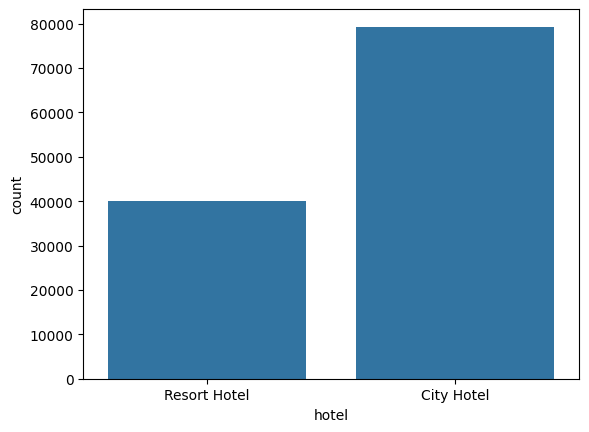

In [14]:
sns.countplot(data=df, x='hotel')

<Axes: xlabel='is_canceled', ylabel='count'>

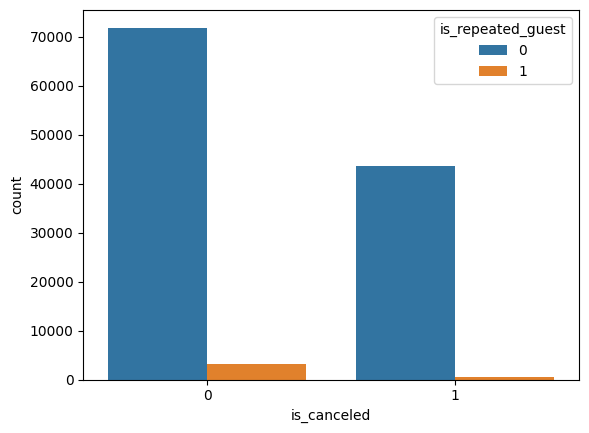

In [15]:
sns.countplot(data=df, x='is_canceled', hue='is_repeated_guest')

<Axes: xlabel='hotel', ylabel='count'>

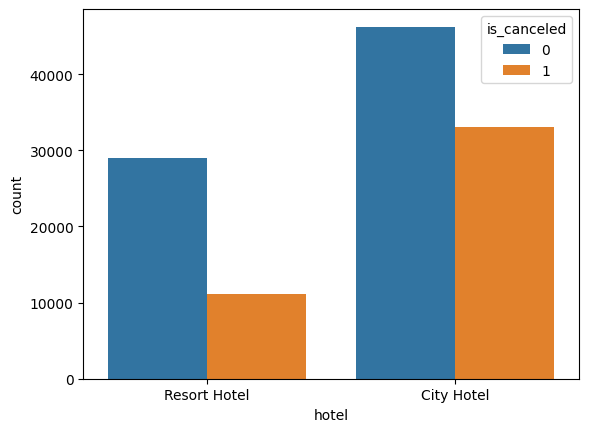

In [16]:
sns.countplot(data=df, x= 'hotel', hue='is_canceled')

# Data Preparation 

### Missing data

In [17]:
df.isnull().values.any()

True

### If we have null values we should work on those null values

In [18]:
df.isnull().sum() #with this code we can see where are those null values

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### Replacing null values with 0

In [19]:
df.fillna(0, inplace=True)

### Meal contains values "Undefined", which is equal to SC

In [20]:
df['meal'].replace("Undefined", "SC", inplace=True)

In [21]:
df['meal'].unique() #Checking the change

array(['BB', 'FB', 'HB', 'SC'], dtype=object)

### Deleting the data of the columns 'children', 'adults', 'babies'

In [22]:
Subset=df[(df['children']==0) & (df['adults']==0) & (df['babies']==0)] #I create a subset to analize

In [23]:
Subset[['adults','babies','children']]

,adults,babies,children
2224,0,0,0.0
2409,0,0,0.0
3181,0,0,0.0
3684,0,0,0.0
3708,0,0,0.0
...,...,...,...
115029,0,0,0.0
115091,0,0,0.0
116251,0,0,0.0
116534,0,0,0.0


In [24]:
type(Subset) # = pandas.core.frame.DataFrame

pandas.core.frame.DataFrame

In [25]:
Delete=(df['children']==0) & (df['adults']==0) & (df['babies']==0)

In [26]:
type(Delete)

pandas.core.series.Series

In [27]:
Delete

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119390, dtype: bool

In [28]:
data=df[~Delete]

In [29]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [30]:
Subset=data[(data['children']==0) & (data['adults']==0) & (data['babies']==0)]

In [31]:
Subset

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date


In [32]:
data.shape #We confirm the data previously, 180 records(119390-119210)

(119210, 32)

In [33]:
119390-119210

180

### We create another csv

In [34]:
data.to_csv('Update_Hotel_booking.csv', index=False)

# Where do the guests come from

In [49]:
guest_country = data[data['is_canceled']==0  ]['country'].value_counts().reset_index()
guest_country.columns = ['country', 'Number of guests']

In [50]:
guest_country

,country,Number of guests
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,BHR,1
162,DJI,1
163,MLI,1
164,NPL,1


### Now I will see how many guests from a country do I have

In [37]:
total_guests = guest_country['Number of guests'].sum()
total_guests

75011

### Now I will have display the percentage for each country

In [51]:
guest_country['Guest in %'] = round( guest_country['Number of guests'] / total_guests * 100, 2)
guest_country

,country,Number of guests,Guest in %
0,PRT,20977,27.97
1,GBR,9668,12.89
2,FRA,8468,11.29
3,ESP,6383,8.51
4,DEU,6067,8.09
...,...,...,...
161,BHR,1,0.00
162,DJI,1,0.00
163,MLI,1,0.00
164,NPL,1,0.00


### I will plot in bar this data extracted

In [53]:
"""
# This give me a plot .html If you want to see it just uncomment this lines
trace = go.Bar(
    x = guest_country['country'],
    y = guest_country['Number of guests'],
    marker=dict(color='#CD7F32')
)
data1 = [trace]
layout = go.Layout(
    title = 'Guests by country'
)
fig = go.Figure(data = data1, layout=layout)
pyo.plot(fig)
"""

'temp-plot.html'

In [40]:
map_guest = px.choropleth(guest_country,
                    locations=guest_country['country'],
                    color=guest_country['Number of guests'], 
                    hover_name=guest_country['country'], 
                    title="Home country of guests")
map_guest.show()

People from all over the world are staying in these two hotels. Most guests are from Portugal and other countries in Europe.

People from all over the world are staying in these two hotels. 50 % of the guests are from Portugal ,Great Britain and France.

How does the price per night vary over the year?


In [41]:
resort = data[(data["hotel"] == "Resort Hotel") & (data["is_canceled"] == 0)]
city = data[(data["hotel"] == "City Hotel") & (data["is_canceled"] == 0)]
resort

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.00,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.00,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.00,0,1,Check-Out,7/3/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,Resort Hotel,0,212,2017,August,35,31,2,8,2,...,No Deposit,143.0,0.0,0,Transient,89.75,0,0,Check-Out,9/10/2017
40056,Resort Hotel,0,169,2017,August,35,30,2,9,2,...,No Deposit,250.0,0.0,0,Transient-Party,202.27,0,1,Check-Out,9/10/2017
40057,Resort Hotel,0,204,2017,August,35,29,4,10,2,...,No Deposit,250.0,0.0,0,Transient,153.57,0,3,Check-Out,9/12/2017
40058,Resort Hotel,0,211,2017,August,35,31,4,10,2,...,No Deposit,40.0,0.0,0,Contract,112.80,0,1,Check-Out,9/14/2017


In [42]:
resort_hotel=resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()
resort_hotel

,arrival_date_month,adr
0,April,75.867816
1,August,181.205892
2,December,68.410104
3,February,54.147478
4,January,48.761125
5,July,150.122528
6,June,107.974850
7,March,57.056838
8,May,76.657558
9,November,48.706289


In [43]:
city_hotel=city.groupby(['arrival_date_month'])['adr'].mean().reset_index()
city_hotel

,arrival_date_month,adr
0,April,111.962267
1,August,118.674598
2,December,88.401855
3,February,86.520062
4,January,82.330983
5,July,115.818019
6,June,117.874360
7,March,90.658533
8,May,120.669827
9,November,86.946592


In [44]:
final=resort_hotel.merge(city_hotel,on='arrival_date_month')
final.columns=['month','price_for_resort','price_for_city_hotel']
final

,month,price_for_resort,price_for_city_hotel
0,April,75.867816,111.962267
1,August,181.205892,118.674598
2,December,68.410104,88.401855
3,February,54.147478,86.520062
4,January,48.761125,82.330983
5,July,150.122528,115.818019
6,June,107.974850,117.874360
7,March,57.056838,90.658533
8,May,76.657558,120.669827
9,November,48.706289,86.946592


In [45]:
final=sd.Sort_Dataframeby_Month(df=final,monthcolumnname='month')
final

,month,price_for_resort,price_for_city_hotel
0,January,48.761125,82.330983
1,February,54.147478,86.520062
2,March,57.056838,90.658533
3,April,75.867816,111.962267
4,May,76.657558,120.669827
5,June,107.974850,117.874360
6,July,150.122528,115.818019
7,August,181.205892,118.674598
8,September,96.416860,112.776582
9,October,61.775449,102.004672


In [46]:
px.line(final, x='month',
        y=['price_for_resort','price_for_city_hotel'],
        title='Room price per night over the Months')

# Correct Way To Plot the Graph

In [54]:
#data["adr_Updated"]=data["adr"]/(data["adults"]+data["children"])
data.loc[:, "adr_Updated"] = data["adr"] / (data["adults"] + data["children"])

In [48]:
resort = data[(data["hotel"] == "Resort Hotel") & (data["is_canceled"] == 0)]
city = data[(data["hotel"] == "City Hotel") & (data["is_canceled"] == 0)]

In [55]:
resort_hotel=resort.groupby(['arrival_date_month'])['adr_Updated'].mean().reset_index()
resort_hotel

,arrival_date_month,adr_Updated
0,April,43.726059
1,August,83.322653
2,December,37.666300
3,February,30.845022
4,January,31.169218
5,July,70.262366
6,June,56.346298
7,March,34.100690
8,May,42.254335
9,November,30.002893


In [56]:
city_hotel=city.groupby(['arrival_date_month'])['adr_Updated'].mean().reset_index()
city_hotel

,arrival_date_month,adr_Updated
0,April,58.715028
1,August,57.771630
2,December,47.724939
3,February,50.950846
4,January,51.280071
5,July,57.258853
6,June,66.335898
7,March,52.477652
8,May,69.987850
9,November,57.142431


In [57]:
final=resort_hotel.merge(city_hotel,on='arrival_date_month')
final.columns=['month','price_for_resort','price_for_city_hotel']
final

,month,price_for_resort,price_for_city_hotel
0,April,43.726059,58.715028
1,August,83.322653,57.771630
2,December,37.666300,47.724939
3,February,30.845022,50.950846
4,January,31.169218,51.280071
5,July,70.262366,57.258853
6,June,56.346298,66.335898
7,March,34.100690,52.477652
8,May,42.254335,69.987850
9,November,30.002893,57.142431


In [59]:
final=sd.Sort_Dataframeby_Month(df=final,monthcolumnname='month')
final

,month,price_for_resort,price_for_city_hotel
0,January,31.169218,51.280071
1,February,30.845022,50.950846
2,March,34.100690,52.477652
3,April,43.726059,58.715028
4,May,42.254335,69.987850
5,June,56.346298,66.335898
6,July,70.262366,57.258853
7,August,83.322653,57.771630
8,September,50.372746,67.042091
9,October,35.144775,61.800547


In [60]:
px.line(final, x='month',
        y=['price_for_resort','price_for_city_hotel'], 
        title='Room price per night over the Months')

#Summer in Portugal sits between June and mid-September 
#while the winter season falls between December 

### How Much Do Guests Pay For A Room Per Night?

In [61]:
df['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L', 'P', 'B'], dtype=object)

In [65]:
data.loc[:, "adr_Updated"] = data["adr"] / (data["adults"] + data["children"])
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_Updated
0,Resort Hotel,0.0,342.0,2015.0,July,27.0,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,Transient,0.00,0.0,0.0,Check-Out,7/1/2015,0.000000
1,Resort Hotel,0.0,737.0,2015.0,July,27.0,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,Transient,0.00,0.0,0.0,Check-Out,7/1/2015,0.000000
2,Resort Hotel,0.0,7.0,2015.0,July,27.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,Transient,75.00,0.0,0.0,Check-Out,7/2/2015,75.000000
3,Resort Hotel,0.0,13.0,2015.0,July,27.0,1.0,0.0,1.0,1.0,...,304.0,0.0,0.0,Transient,75.00,0.0,0.0,Check-Out,7/2/2015,75.000000
4,Resort Hotel,0.0,14.0,2015.0,July,27.0,1.0,0.0,2.0,2.0,...,240.0,0.0,0.0,Transient,98.00,0.0,1.0,Check-Out,7/3/2015,49.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119386,City Hotel,0.0,102.0,2017.0,August,35.0,31.0,2.0,5.0,3.0,...,9.0,0.0,0.0,Transient,225.43,0.0,2.0,Check-Out,9/7/2017,75.143333
119387,City Hotel,0.0,34.0,2017.0,August,35.0,31.0,2.0,5.0,2.0,...,9.0,0.0,0.0,Transient,157.71,0.0,4.0,Check-Out,9/7/2017,78.855000
119388,City Hotel,0.0,109.0,2017.0,August,35.0,31.0,2.0,5.0,2.0,...,89.0,0.0,0.0,Transient,104.40,0.0,0.0,Check-Out,9/7/2017,52.200000
119389,City Hotel,0.0,205.0,2017.0,August,35.0,29.0,2.0,7.0,2.0,...,9.0,0.0,0.0,Transient,151.20,0.0,2.0,Check-Out,9/7/2017,75.600000


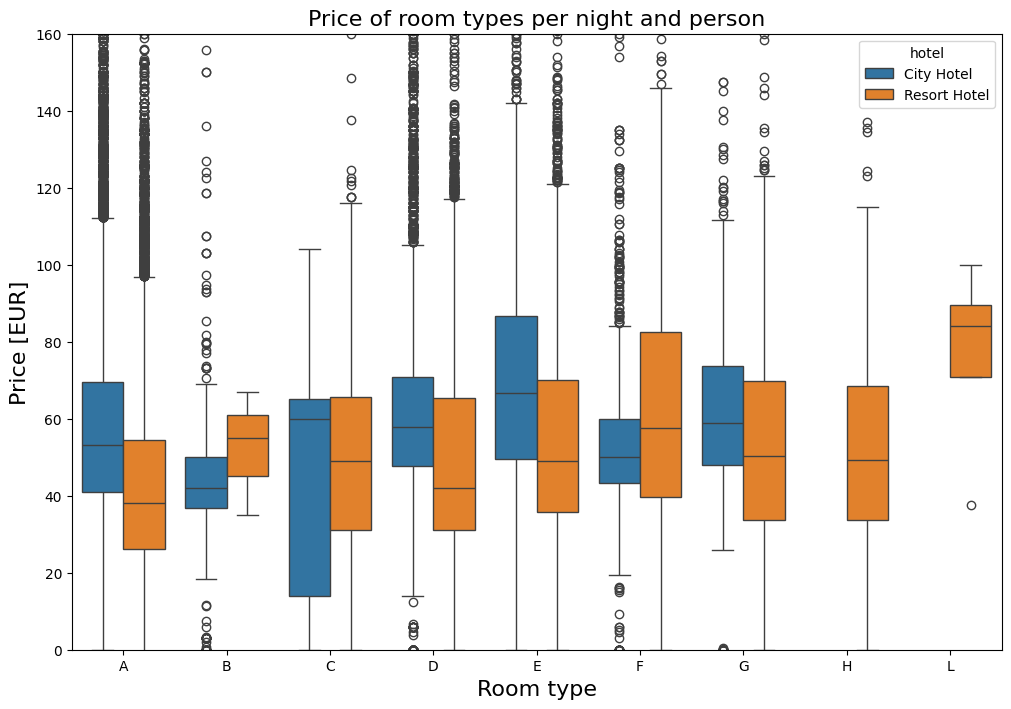

In [66]:
data.loc[:, "adr_Updated"] = data["adr"] / (data["adults"] + data["children"])
valid_guest = data.loc[data["is_canceled"] == 0]
prices = valid_guest[["hotel", "reserved_room_type", "adr_Updated"]].sort_values("reserved_room_type")

plt.figure(figsize=(12, 8))
sns.boxplot(x="reserved_room_type",
            y="adr_Updated",
            hue="hotel",
            data=prices
           )
plt.title("Price of room types per night and person", fontsize=16)
plt.xlabel("Room type", fontsize=16)
plt.ylabel("Price [EUR]", fontsize=16)

plt.ylim(0, 160)
plt.show()

In [67]:
prices_C = prices[prices['reserved_room_type']=='C']
prices_C

,hotel,reserved_room_type,adr_Updated
119278,City Hotel,C,104.000000
99432,City Hotel,C,65.000000
99431,City Hotel,C,65.000000
101137,City Hotel,C,55.000000
0,Resort Hotel,C,0.000000
...,...,...,...
27668,Resort Hotel,C,88.500000
39525,Resort Hotel,C,87.500000
15642,Resort Hotel,C,62.500000
15609,Resort Hotel,C,40.500000


In [68]:
prices_City = prices_C[prices_C['hotel']=='City Hotel']
prices_Resort = prices_C[prices_C['hotel']=='Resort Hotel']
prices_Resort

,hotel,reserved_room_type,adr_Updated
0,Resort Hotel,C,0.000000
34951,Resort Hotel,C,30.250000
15955,Resort Hotel,C,47.366667
25990,Resort Hotel,C,62.166667
15960,Resort Hotel,C,90.000000
...,...,...,...
27668,Resort Hotel,C,88.500000
39525,Resort Hotel,C,87.500000
15642,Resort Hotel,C,62.500000
15609,Resort Hotel,C,40.500000


In [69]:
prices_City

,hotel,reserved_room_type,adr_Updated
119278,City Hotel,C,104.0
99432,City Hotel,C,65.0
99431,City Hotel,C,65.0
101137,City Hotel,C,55.0
82509,City Hotel,C,0.0
82508,City Hotel,C,0.0
44693,City Hotel,C,65.0
80557,City Hotel,C,18.5


In [70]:
prices_Resort.describe()

,adr_Updated
count,615.000000
mean,50.549085
std,27.821397
min,0.000000
25%,31.000000
50%,49.000000
75%,65.562500
max,171.000000


### How long do people stay at the hotels?

In [78]:
df3 = data[data['is_canceled'] == 0].copy()
df3["total_nights"] = df3["stays_in_weekend_nights"] + df3["stays_in_week_nights"]

In [79]:
df3

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,adr_Updated,total_nights
0,Resort Hotel,0.0,342.0,2015.0,July,27.0,1.0,0.0,0.0,2.0,...,0.0,0.0,Transient,0.00,0.0,0.0,Check-Out,7/1/2015,0.000000,0.0
1,Resort Hotel,0.0,737.0,2015.0,July,27.0,1.0,0.0,0.0,2.0,...,0.0,0.0,Transient,0.00,0.0,0.0,Check-Out,7/1/2015,0.000000,0.0
2,Resort Hotel,0.0,7.0,2015.0,July,27.0,1.0,0.0,1.0,1.0,...,0.0,0.0,Transient,75.00,0.0,0.0,Check-Out,7/2/2015,75.000000,1.0
3,Resort Hotel,0.0,13.0,2015.0,July,27.0,1.0,0.0,1.0,1.0,...,0.0,0.0,Transient,75.00,0.0,0.0,Check-Out,7/2/2015,75.000000,1.0
4,Resort Hotel,0.0,14.0,2015.0,July,27.0,1.0,0.0,2.0,2.0,...,0.0,0.0,Transient,98.00,0.0,1.0,Check-Out,7/3/2015,49.000000,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0.0,23.0,2017.0,August,35.0,30.0,2.0,5.0,2.0,...,0.0,0.0,Transient,96.14,0.0,0.0,Check-Out,9/6/2017,48.070000,7.0
119386,City Hotel,0.0,102.0,2017.0,August,35.0,31.0,2.0,5.0,3.0,...,0.0,0.0,Transient,225.43,0.0,2.0,Check-Out,9/7/2017,75.143333,7.0
119387,City Hotel,0.0,34.0,2017.0,August,35.0,31.0,2.0,5.0,2.0,...,0.0,0.0,Transient,157.71,0.0,4.0,Check-Out,9/7/2017,78.855000,7.0
119388,City Hotel,0.0,109.0,2017.0,August,35.0,31.0,2.0,5.0,2.0,...,0.0,0.0,Transient,104.40,0.0,0.0,Check-Out,9/7/2017,52.200000,7.0


In [80]:
df4 = df3[['total_nights','hotel','is_canceled']]
df4

,total_nights,hotel,is_canceled
0,0.0,Resort Hotel,0.0
1,0.0,Resort Hotel,0.0
2,1.0,Resort Hotel,0.0
3,1.0,Resort Hotel,0.0
4,2.0,Resort Hotel,0.0
...,...,...,...
119385,7.0,City Hotel,0.0
119386,7.0,City Hotel,0.0
119387,7.0,City Hotel,0.0
119388,7.0,City Hotel,0.0


In [81]:
hotel_stay = df4.groupby(['total_nights','hotel']).agg('count').reset_index()
hotel_stay

,total_nights,hotel,is_canceled
0,0.0,City Hotel,251
1,0.0,Resort Hotel,371
2,1.0,City Hotel,9155
3,1.0,Resort Hotel,6579
4,2.0,City Hotel,10983
...,...,...,...
57,46.0,Resort Hotel,1
58,48.0,City Hotel,1
59,56.0,Resort Hotel,1
60,60.0,Resort Hotel,1


In [82]:
hotel_stay = hotel_stay.rename(columns={'is_canceled':'Number of stays'})
hotel_stay.head()

,total_nights,hotel,Number of stays
0,0.0,City Hotel,251
1,0.0,Resort Hotel,371
2,1.0,City Hotel,9155
3,1.0,Resort Hotel,6579
4,2.0,City Hotel,10983


In [83]:
hotel_stay_r = hotel_stay[hotel_stay['hotel']=='Resort Hotel']
hotel_stay_r

,total_nights,hotel,Number of stays
1,0.0,Resort Hotel,371
3,1.0,Resort Hotel,6579
5,2.0,Resort Hotel,4488
7,3.0,Resort Hotel,3828
9,4.0,Resort Hotel,3321
11,5.0,Resort Hotel,1899
13,6.0,Resort Hotel,1205
15,7.0,Resort Hotel,4434
17,8.0,Resort Hotel,509
19,9.0,Resort Hotel,408


In [84]:
hotel_stay_c = hotel_stay[hotel_stay['hotel']=='City Hotel']
hotel_stay_c

,total_nights,hotel,Number of stays
0,0.0,City Hotel,251
2,1.0,City Hotel,9155
4,2.0,City Hotel,10983
6,3.0,City Hotel,11889
8,4.0,City Hotel,7694
10,5.0,City Hotel,3210
12,6.0,City Hotel,1111
14,7.0,City Hotel,1245
16,8.0,City Hotel,205
18,9.0,City Hotel,119


In [85]:
"""
# We make another plot on html
trace = go.Bar(
    x=hotel_stay_r["total_nights"],
    y=hotel_stay_r["Number of stays"],
    name='Resort Stay'
    )

trace1=go.Bar(
    x=hotel_stay_c["total_nights"],
    y=hotel_stay_c["Number of stays"],
    name='City stay'
    )


data5 = [trace,trace1]
layout = go.Layout(
    title='Total Number of stays by Guest'
)
fig = go.Figure(data=data5, layout=layout)
pyo.plot(fig)
"""

'\n# We make another plot on html\ntrace = go.Bar(\n    x=hotel_stay_r["total_nights"],\n    y=hotel_stay_r["Number of stays"],\n    name=\'Resort Stay\'\n    )\n\ntrace1=go.Bar(\n    x=hotel_stay_c["total_nights"],\n    y=hotel_stay_c["Number of stays"],\n    name=\'City stay\'\n    )\n\n\ndata5 = [trace,trace1]\nlayout = go.Layout(\n    title=\'Total Number of stays by Guest\'\n)\nfig = go.Figure(data=data5, layout=layout)\npyo.plot(fig)\n'

#### Bookings by market segment 

In [86]:
segments=data["market_segment"].value_counts()
segments

market_segment
Online TA        56408
Offline TA/TO    24182
Groups           19791
Direct           12582
Corporate         5282
Complementary      728
Aviation           235
Undefined            2
Name: count, dtype: int64

In [87]:
segments=data["market_segment"].value_counts()

# pie plot
fig = px.pie(segments,
             values=segments.values,
             names=segments.index,
             title="Bookings per market segment",
             template="seaborn")
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

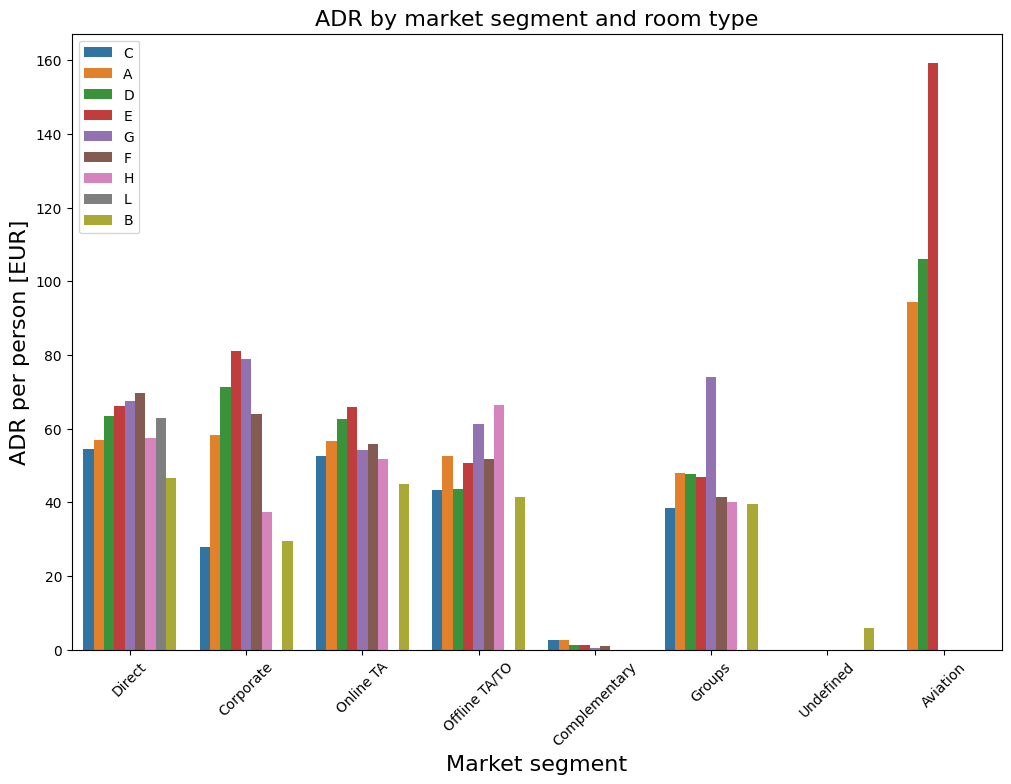

In [89]:
plt.figure(figsize=(12, 8))
sns.barplot(x="market_segment",
            y="adr_Updated",
            hue="reserved_room_type",
            data=data,
            errorbar=None)
plt.title("ADR by market segment and room type", fontsize=16)
plt.xlabel("Market segment", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("ADR per person [EUR]", fontsize=16)
plt.legend(loc="upper left")
plt.show()

#### How many bookings were canceled?

In [90]:
Cancel=data['is_canceled']==1